In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# 이제 Colab TF default version TF 2.2.0
import tensorflow as tf
tf.__version__

'2.2.0-rc1'

In [0]:
from keras.datasets import mnist # MNIST dataset 불러오기
from keras.utils import np_utils

import numpy as np
import sys # 출력을 위해

Using TensorFlow backend.


In [0]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [0]:
# MNIST 데이터셋 불러오기
# Keras MNIST 데이터는 70,000개의 이미지 중 60,000개를 학습용으로, 10,000개를 테스트용으로 미리 구분함
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11493376/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


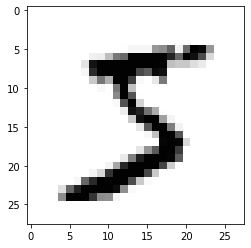

In [0]:
# 이미지로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [0]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
# 코드로 확인
# 28x28=784개의 픽셀로 이루어진 픽셀, 각 픽셀은 밝기 정도에 따라 0~255 사이의 숫자로 채워짐 (흰색이 0, 검은색이 255)
# -> 784개의 속성으로 0~9까지의 10개 클래스 중 하나를 맞히는 문제가 됨. (Multi classification - ex. Iris)
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


**차원 변환**

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
# 차원 변환 과정
# reshape(총 샘플 수, 1차원 속성 수)
X_train = X_train.reshape(X_train.shape[0], 784)
X_train[0].shape

(784,)

In [0]:
X_train.shape

(60000, 784)

**정규화**

In [0]:
# 정규화: 데이터의 폭이 클 때 적절한 값으로 분산 정도를 바꿈.
# 케라스는 데이터를 0~1 사이 값으로 변환 후 구동 시 최적의 성능을 보임. 0~225 사이의 값으로 이루어진 값을 0~1 사이 값으로 바꿈.
X_train = X_train.astype('float64') # 정규화를 위해 실수형으로 바꿈
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [0]:
# 클래스 값 확인 (아까 이미지로 확인했던 숫자 5)
print("class : %d " % (Y_class_train[0]))

class : 5 


**원핫인코딩**

In [0]:
# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)